In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2021-01-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-01-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  14850   Î∂ÄÏÇ∞ÏßÑÍµ¨  14850   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2021-01-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2021-01-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  14562   Î∂ÄÏÇ∞ÏßÑÍµ¨  14562   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2021-01-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   7347   Î∂ÄÏÇ∞ÏßÑÍµ¨   7347   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2021-01-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3490   Î∂ÄÏÇ∞ÏßÑÍµ¨   3490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2021-01-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7490   Î∂ÄÏÇ∞ÏßÑÍµ¨   7490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2021-01-07     ÎåÄÌåå                      1.0„éè   4931   Î∂ÄÏÇ∞ÏßÑÍµ¨   4931   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2021-01-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  17950   Î∂ÄÏÇ∞ÏßÑÍµ¨  17950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2021-01-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2021-01-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2021-01-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2021-01-07      Î¨¥                   2.0„éè 1Í∞ú   4580   Î∂ÄÏÇ∞ÏßÑÍµ¨   4580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2021-01-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3090   Î∂ÄÏÇ∞ÏßÑÍµ¨   3090   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2021-01-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2570   Î∂ÄÏÇ∞ÏßÑÍµ¨   2570   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2021-01-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  29980   Î∂ÄÏÇ∞ÏßÑÍµ¨  29980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2021-01-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2653   Î∂ÄÏÇ∞ÏßÑÍµ¨   2653   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2021-01-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2021-01-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2021-01-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  27835   Î∂ÄÏÇ∞ÏßÑÍµ¨  27835   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2021-01-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2021-01-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2021-01-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1250   Î∂ÄÏÇ∞ÏßÑÍµ¨   1250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2021-01-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  63950   Î∂ÄÏÇ∞ÏßÑÍµ¨  63950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2021-01-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4788   Î∂ÄÏÇ∞ÏßÑÍµ¨   4788   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2021-01-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  58900   Î∂ÄÏÇ∞ÏßÑÍµ¨  58900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2021-01-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   4289   Î∂ÄÏÇ∞ÏßÑÍµ¨   4289   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2021-01-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5423   Î∂ÄÏÇ∞ÏßÑÍµ¨   5423   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2021-01-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Î∂ÄÏÇ∞ÏßÑÍµ¨    796   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2021-01-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8490   Î∂ÄÏÇ∞ÏßÑÍµ¨   8490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2021-01-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2021-01-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2021-01-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  19900   Î∂ÄÏÇ∞ÏßÑÍµ¨  19900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  14,850  
1      0    0.0%   6,347  
2      0    0.0%  14,562  
3      0    0.0%   7,347  
4      0    0.0%   3,490  
5      0    0.0%   7,490  
6      0    0.0%   4,931  
7      0    0.0%  17,950  
8      0    0.0%   5,194  
9      0    0.0% 

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2021-04-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-04-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   9675   Î∂ÄÏÇ∞ÏßÑÍµ¨   9675   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2021-04-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2021-04-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11319   Î∂ÄÏÇ∞ÏßÑÍµ¨  11319   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2021-04-08    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4822   Î∂ÄÏÇ∞ÏßÑÍµ¨   4822   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2021-04-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2021-04-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2021-04-08     ÎåÄÌåå                      1.0„éè   7459   Î∂ÄÏÇ∞ÏßÑÍµ¨   7459   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2021-04-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  15950   Î∂ÄÏÇ∞ÏßÑÍµ¨  15950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2021-04-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2021-04-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2021-04-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2021-04-08      Î¨¥                   2.0„éè 1Í∞ú   2253   Î∂ÄÏÇ∞ÏßÑÍµ¨   2253   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2021-04-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3090   Î∂ÄÏÇ∞ÏßÑÍµ¨   3090   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2021-04-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6660   Î∂ÄÏÇ∞ÏßÑÍµ¨   6660   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2021-04-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  35600   Î∂ÄÏÇ∞ÏßÑÍµ¨  35600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2021-04-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2021-04-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2021-04-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2021-04-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  29978   Î∂ÄÏÇ∞ÏßÑÍµ¨  29978   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2021-04-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2021-04-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2021-04-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1250   Î∂ÄÏÇ∞ÏßÑÍµ¨   1250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2021-04-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  71950   Î∂ÄÏÇ∞ÏßÑÍµ¨  71950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2021-04-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6990   Î∂ÄÏÇ∞ÏßÑÍµ¨   6990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2021-04-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  58900   Î∂ÄÏÇ∞ÏßÑÍµ¨  58900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2021-04-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   7516   Î∂ÄÏÇ∞ÏßÑÍµ¨   7516   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2021-04-08    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6840   Î∂ÄÏÇ∞ÏßÑÍµ¨   6840   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2021-04-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Î∂ÄÏÇ∞ÏßÑÍµ¨    796   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2021-04-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8490   Î∂ÄÏÇ∞ÏßÑÍµ¨   8490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2021-04-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2021-04-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3390   Î∂ÄÏÇ∞ÏßÑÍµ¨   3390   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2021-04-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  26100   Î∂ÄÏÇ∞ÏßÑÍµ¨  26100   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   9,675  
1      0    0.0%   6,347  
2      0    0.0%  11,319  
3      0    0.0%   4,822  
4      0    0.0%   3,990  
5      0    0.0%   5,990  
6      0    0.0%   7,459  
7      0    0.0%  15,950  
8      0    0.0%   5,194  
9      0    0.0% 

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2021-07-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-07-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  11925   Î∂ÄÏÇ∞ÏßÑÍµ¨  11925   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2021-07-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2021-07-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  14150   Î∂ÄÏÇ∞ÏßÑÍµ¨  14150   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2021-07-08    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4452   Î∂ÄÏÇ∞ÏßÑÍµ¨   4452   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2021-07-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   4300   Î∂ÄÏÇ∞ÏßÑÍµ¨   4300   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2021-07-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2021-07-08     ÎåÄÌåå                      1.0„éè   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2021-07-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  19950   Î∂ÄÏÇ∞ÏßÑÍµ¨  19950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2021-07-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2021-07-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2021-07-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2021-07-08      Î¨¥                   2.0„éè 1Í∞ú   1650   Î∂ÄÏÇ∞ÏßÑÍµ¨   1650   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2021-07-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3490   Î∂ÄÏÇ∞ÏßÑÍµ¨   3490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2021-07-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9160   Î∂ÄÏÇ∞ÏßÑÍµ¨   9160   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2021-07-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  39800   Î∂ÄÏÇ∞ÏßÑÍµ¨  39800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2021-07-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3300   Î∂ÄÏÇ∞ÏßÑÍµ¨   3300   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2021-07-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2021-07-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13990   Î∂ÄÏÇ∞ÏßÑÍµ¨  13990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2021-07-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  29978   Î∂ÄÏÇ∞ÏßÑÍµ¨  29978   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2021-07-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2680   Î∂ÄÏÇ∞ÏßÑÍµ¨   2680   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2021-07-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2021-07-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1250   Î∂ÄÏÇ∞ÏßÑÍµ¨   1250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2021-07-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  69950   Î∂ÄÏÇ∞ÏßÑÍµ¨  69950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2021-07-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6990   Î∂ÄÏÇ∞ÏßÑÍµ¨   6990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2021-07-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  62900   Î∂ÄÏÇ∞ÏßÑÍµ¨  62900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2021-07-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   5365   Î∂ÄÏÇ∞ÏßÑÍµ¨   5365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2021-07-08    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7447   Î∂ÄÏÇ∞ÏßÑÍµ¨   7447   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2021-07-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Î∂ÄÏÇ∞ÏßÑÍµ¨    796   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2021-07-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8990   Î∂ÄÏÇ∞ÏßÑÍµ¨   8990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2021-07-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2021-07-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300   Î∂ÄÏÇ∞ÏßÑÍµ¨   3300   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2021-07-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  27900   Î∂ÄÏÇ∞ÏßÑÍµ¨  27900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  11,925  
1      0    0.0%   6,347  
2      0    0.0%  14,150  
3      0    0.0%   4,452  
4      0    0.0%   4,300  
5      0    0.0%   5,990  
6      0    0.0%   2,790  
7      0    0.0%  19,950  
8      0    0.0%   5,194  
9      0    0.0% 

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2021-10-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-10-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  11925   Î∂ÄÏÇ∞ÏßÑÍµ¨  11925   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2021-10-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2021-10-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11627   Î∂ÄÏÇ∞ÏßÑÍµ¨  11627   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2021-10-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   9975   Î∂ÄÏÇ∞ÏßÑÍµ¨   9975   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2021-10-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   4300   Î∂ÄÏÇ∞ÏßÑÍµ¨   4300   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2021-10-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7990   Î∂ÄÏÇ∞ÏßÑÍµ¨   7990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2021-10-07     ÎåÄÌåå                      1.0„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2021-10-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  19450   Î∂ÄÏÇ∞ÏßÑÍµ¨  19450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2021-10-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2021-10-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736   Î∂ÄÏÇ∞ÏßÑÍµ¨    736   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2021-10-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2021-10-07      Î¨¥                   2.0„éè 1Í∞ú   2120   Î∂ÄÏÇ∞ÏßÑÍµ¨   2120   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2021-10-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3490   Î∂ÄÏÇ∞ÏßÑÍµ¨   3490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2021-10-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9160   Î∂ÄÏÇ∞ÏßÑÍµ¨   9160   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2021-10-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  31980   Î∂ÄÏÇ∞ÏßÑÍµ¨  31980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2021-10-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4490   Î∂ÄÏÇ∞ÏßÑÍµ¨   4490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2021-10-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2021-10-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12500   Î∂ÄÏÇ∞ÏßÑÍµ¨  12500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2021-10-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  23550   Î∂ÄÏÇ∞ÏßÑÍµ¨  23550   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2021-10-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2680   Î∂ÄÏÇ∞ÏßÑÍµ¨   2680   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2021-10-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   1790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2021-10-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1310   Î∂ÄÏÇ∞ÏßÑÍµ¨   1310   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2021-10-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  75600   Î∂ÄÏÇ∞ÏßÑÍµ¨  75600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2021-10-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2021-10-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  47900   Î∂ÄÏÇ∞ÏßÑÍµ¨  47900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2021-10-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   4075   Î∂ÄÏÇ∞ÏßÑÍµ¨   4075   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2021-10-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5500   Î∂ÄÏÇ∞ÏßÑÍµ¨   5500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2021-10-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    880   Î∂ÄÏÇ∞ÏßÑÍµ¨    880   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2021-10-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   9290   Î∂ÄÏÇ∞ÏßÑÍµ¨   9290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2021-10-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2021-10-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2890   Î∂ÄÏÇ∞ÏßÑÍµ¨   2890   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2021-10-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  20900   Î∂ÄÏÇ∞ÏßÑÍµ¨  20900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  11,925  
1      0    0.0%   6,347  
2      0    0.0%  11,627  
3      0    0.0%   9,975  
4      0    0.0%   4,300  
5      0    0.0%   7,990  
6      0    0.0%   3,290  
7      0    0.0%  19,450  
8      0    0.0%   5,194  
9      0    0.0% 

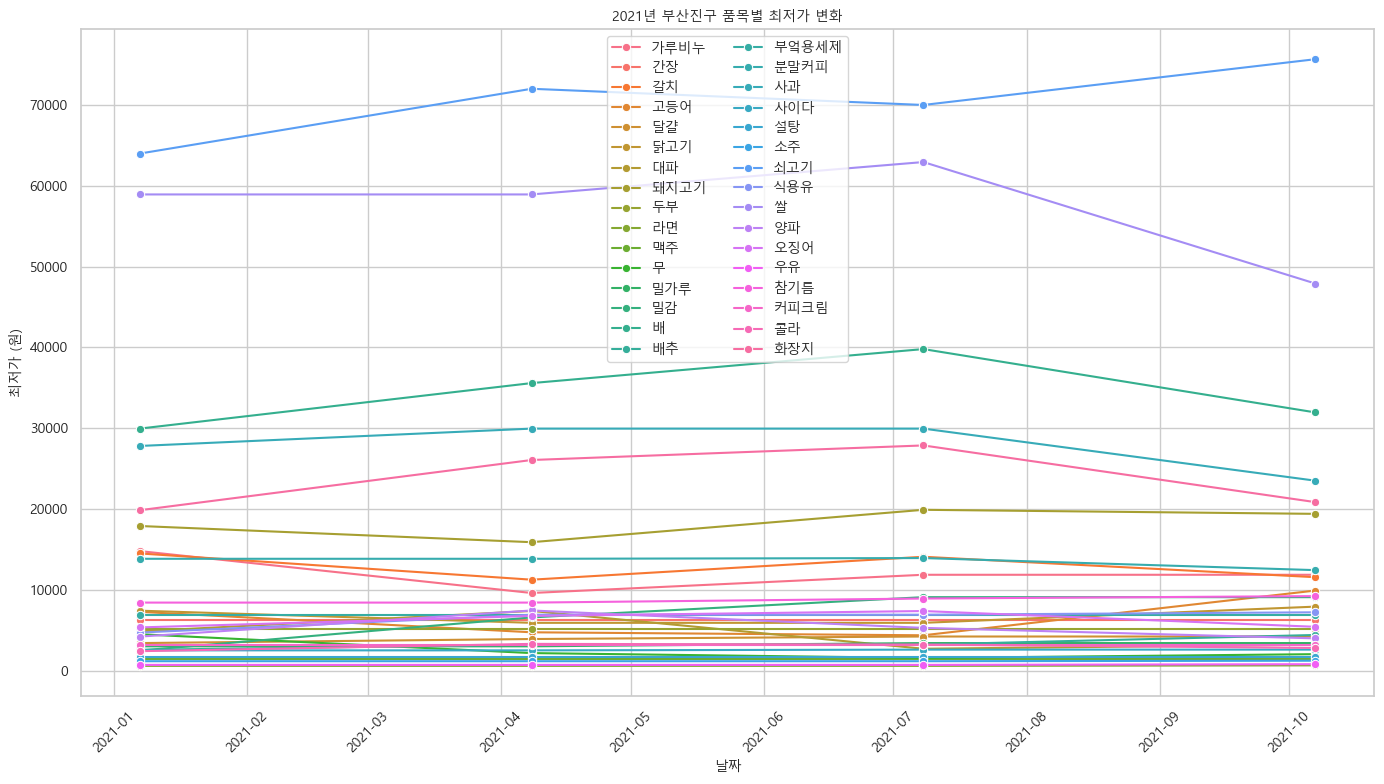

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_min.csv", index=False, encoding="utf-8-sig")

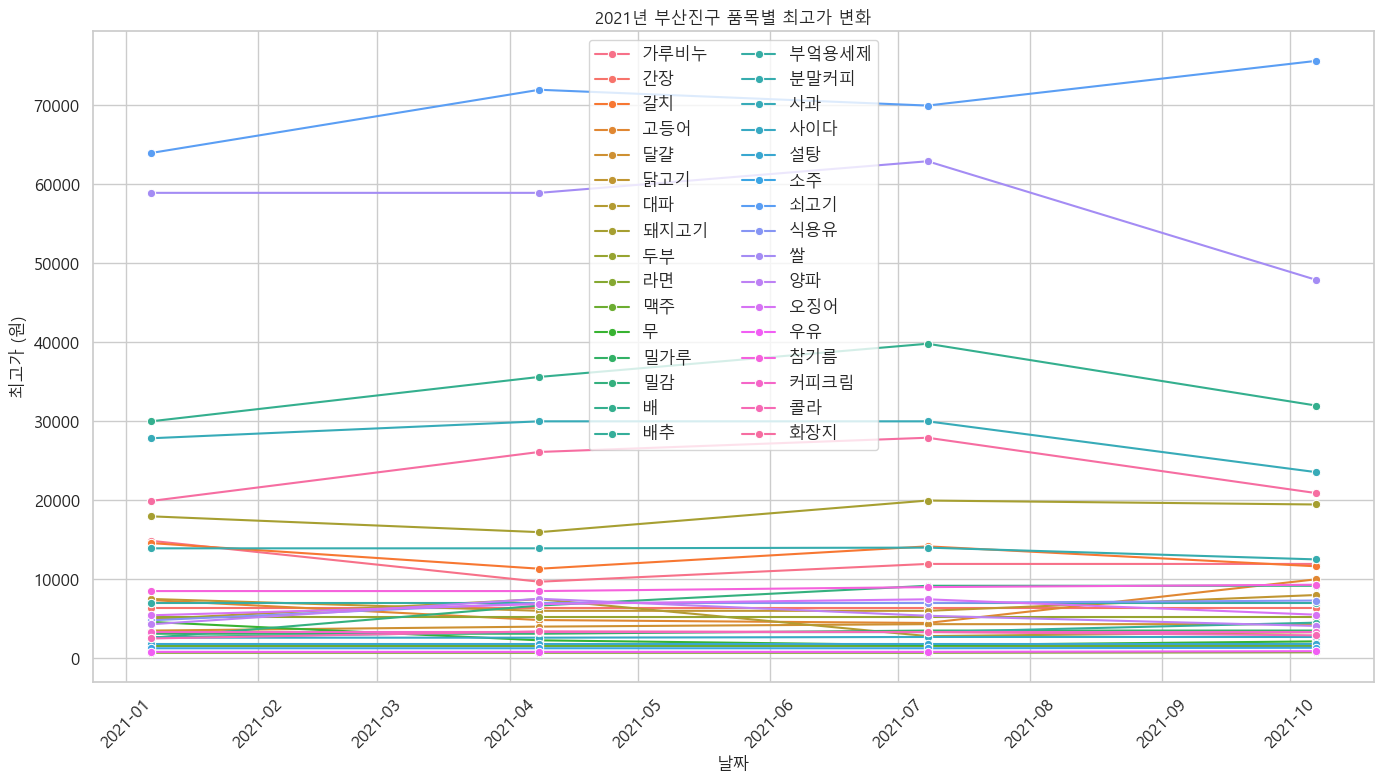

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2021_max.csv", index=False, encoding="utf-8-sig")